# รู้จักกับ self-organizing map (SOM หรืออีกชื่อ คือ Kohonen network)

## บทนำ

การนำ artificial neural networks มาใช้ในงาน data science/machine learning นั้น กำลังได้รับความนิยมอย่างมาก โดยงานส่วนใหญ่ที่คนได้ยินจะพูดถึงโมเดลของ multilayer perceptron ที่เป็น supervised network ที่มีจุดประสงค์เพื่อทำนายผลลัพธ์จากตัวแปรต้นที่ผู้ใช้ป้อนให้ ตัวอย่างการใช้งานก็เช่น การให้คำตอบว่ารูปที่ผู้ใช้ป้อนเข้าระบบนั้นเป็นรูปแมวหรือไม่ จนไปถึงการทำนายอากาศ หรือทำนายโรคจากอาการของผู้ป่วย

นอกจาก supervised network ที่สามารถให้ผลลัพธ์เป็นการทำนายค่าแล้ว artificial neural network ยังสามารถนำไปประยุกต์ใช้งานแบบ unsupervised ได้ด้วย โดย SOM ถือเป็นหนึ่งในโมเดลที่มีความสามารถด้านนี้ โดยสามารถจัดเรียงชุดข้อมูลตัวอย่างโดยให้ข้อมูลที่มีความคล้ายกันอยู่ในกลุ่มเดียวกัน หรือในกลุ่มใกล้เคียงกัน ตัวอย่างการใช้งานของ SOM ก็เช่น การจำแนกประเภทผู้ใช้สินค้า (customer segmentation)

บทความนี้จะพูดถึงหลักการทำงานของ SOM แบบง่ายๆ โดยใช้ต้วอย่างการจัดกลุ่ม pokemons จากนั้นจะพูดถึงการ update map พร้อมตัวอย่าง code และปิดท้ายด้วยการใช้ข้อมูลจริงเพื่อแสดงตัวอย่างการจัดเรียงกลุ่มประเทศโดยใช้ข้อมูลผลิตภัณฑ์มวลรวมต่อประชากร (GDP per capita) และดัชนีความเหลื่อมล้ำทางรายได้ (income inequality index)

data from 
https://ourworldindata.org/

lecture note: http://labs.seas.wustl.edu/bme/raman/Lectures/Lecture10_CompetitiveLearning.pdf
http://www.ai-junkie.com/ann/som/som5.html

example: https://github.com/llSourcell/neural_networks/blob/master/self_organizing_map_demo.ipynb

# หลักการของ Self-organizing map

##  จัดข้อมูลลง map

อย่างที่ได้เกริ่นไว้ว่า SOM นั้นสามารถจัดเรียงหมวดหมู่ของข้อมูลให้เราได้เอง ซึ่งการจะเรียงหมวดหมู่ข้อมูลนั้นก็ต้องมีช่องให้เราทำการจำแนกข้อมูลใช่มั้ยครับ ดังนั้น สิ่งแรกที่เราจะทำก็คือการออกแบบการจัดวางช่องพวกนี้หรือการออกแบบ map นั่นเองล่ะครับ โดยตัวอย่างง่ายๆ ก็คือใช้ map แบบ 2D นี่ล่ะครับ

![Grid and pokemons](SOM_01.png)

โดยแต่ละช่องก็จะมี coordinate หรือ พิกัด (x, y) กำกับครับ

ทีนี้การจะเอาข้อมูลแต่ละตัวที่เรามีไปจำแนกเข้าหมวดหมู่เหล่านี้ เราก็ต้องรู้ว่า features หรือ ตัวแปร ที่เราจะใช้เพื่อจำแนกมีอะไรบ้าง เช่น เราต้องการแยกหมวด pokemon ตาม 1.น้ำหนัก (w) และ 2.ความสูง (h)

เราก็จะติดป้ายที่แต่ละช่อง (x, y) เช่นว่า ช่อง (x=0, y=0) สำหรับ pokemon น้ำหนัก w=w_0 และความสูง h=h_0


หลังจากนั้นเราก็มาจัด pokemon ลงช่องพวกนี้กัน โดยช่องไหนมีค่า w และ h ใกล้เคียงกับค่าน้ำหนักและส่วนสูงจริงของ pokemon นั้นๆ ที่สุด เราก็จับเอา pokemon ลงช่องนั้น

เป็นไงครับ ง่ายสุดๆ ไปเลย

## จัดระเบียบ map โดยการ update ค่า features

ทีนี้เราลองมานึกดูว่า ทำอย่างไรเราถึงจะทำให้จัดแยก pokemons ลงช่องต่างๆ นั้น เป็นระบบระเบียบ เพื่อที่จะสามารถช่วยให้เราจำแนกประเภทของ pokemons ได้ง่าย

อย่างนึงที่ทำได้ก็คือ จัดให้ช่องที่อยู่ใกล้ๆ กัน มีค่า w และ h ใกล้เคียงกัน เพื่อให้ pokemon ที่มีน้ำหนักและส่วนสูงใกล้เคียงกันอยู่ช่องใกล้ๆ กัน 
ในทางกลับกันหากจัดค่า w และ h มั่วๆ เช่น ให้ช่องที่มีค่า w น้อยที่สุด และช่องที่มีค่า w มากที่สุด อยู่ติดกัน pokemon ตัวเบาที่สุดและตัวหนักที่สุดก็จะไปอยู่ใกล้กัน เช่นนี้ ก็ไม่ช่วยให้เราจำแนกหมวดของ pokemons ได้


อีกอย่างหนึ่งก็คือ จัดให้ระยะ หรือ range ของค่า w และค่า h ของช่องทั้งหมดที่เรามีนั้นอยู่ใน range ใกล้เคียงกับ range ของค่าน้ำหนักและส่วนสูงจริงของ pokemons ที่เรามี 
ไม่เช่นนั้นแล้วก็จะ pokemons ของเราก็จะไปกองอยู่ช่องเดียวกันซะทั้งหมด ทำให้จำแนกไม่ได้ เช่น หาก pokemons ที่เรามีมีน้ำหนักระหว่าง 0-300 kg และสูง 0-3 meter แต่ช่องที่เรามีดันจัดระยะ w และ h เป็นจาก 0-3000 kg และ 0-30 meter ก็จะกลายเป็นว่า pokemon ทุกตัวจะไปรวมกันอยู่แค่ช่องเดียว

![Useful and not useful maps](SOM_02.png)

ความยากของ SOM ก็คือการจะทำอย่างไรให้ map ของเรา update หรือปรับค่า features (ในตัวอย่าง pokemon ก็คือค่า w และ h) เหล่านี้ได้ด้วยตัวเอง (self-organized) ซึ่งอธิบายให้เห็นภาพง่ายๆ ตามนี้ครับ

สมมติเราต้องการจัดค่า w และ h ของ map โดยใช้น้ำหนักและส่วนสูงของ pokemon สามตัวเป็นค่าอ้างอิง
* ตัวสีม่วง น้ำหนักเยอะ และ ตัวสูง
* ตัวสีส้ม น้ำหนักเยอะ และ ตัวไม่สูง
* ตัวสีเขียว น้ำหนักน้อย และ ตัวไม่สูง

![Initialized map and reference data](SOM_03.png)

ขั้นตอนการ update map โดยที่เราไม่ตั้งค่า w และ h ของแต่ละช่องของ map เอง ก็จะสามารถทำได้ ดังนี้
1. Initial map randomization: ตั้งค่า w และ h แบบสุ่ม 
2. Finding winner index: เลือกตัวอย่างอ้างอิงหนึ่งตัว เช่น ตัวสีม่วง แล้วหาช่องใน map ที่ีมีค่า w และ h ใกล้เคียงค่าน้ำหนักและส่วนสูงของตัวอย่าง pokemon นั้น
3. Neighbor selection: ตั้งขอบเขตของช่องใน map ที่ต้องการ update ค่า w และ h โดยเทียบจากตำแหน่งของ winner index
4. Map update: update ค่า w และ h ของ winner index และช่องที่อยู่ในขอบเขตที่กำหนดไว้ในขั้นตอนที่ **3** โดยให้ค่า w และ h ในช่องเหล่านี้ปรับค่าให้ใกล้เคียงขึ้นเทียบกับน้ำหนักและส่วนสูงของตัว pokemon อ้างอิง
5. Iteration over data points: ทำซ้ำขั้นตอนที่ **2**-**4** โดยเปลี่ยนตัวข้อมูลอ้างอิงเป็น pokemon ตัวสีส้ม และตัวสีเขียวตามลำดับ (จริงๆ ลำดับสามารถสับเปลี่ยนได้)
6. Iteration over the entire data set: ทำซ้ำขั้นตอนที่ **2**-**5** โดยลดขนาดขอบเขตของ neighbor selection ในขั้นตอนที่ **3** (ลดขนาดวงกลมลง) และลดค่าระดับการ update ในขั้นตอนที่ **4**

![SOM training process](SOM_04.png)

เมื่อทำขั้นตอนที่ 6 ซ้ำหลายๆ map ของเราที่เริ่มจากการตั้งค่าแบบสุ่มก็จะ stable โดยเกิดจากการที่เราลดค่าขอบเขต neighbor selection และระดับการ update ลง จนทั้งสองค่านี้เข้าใกล้ 0 เป็นการจบกระบวนการ self-organization

ข้อควรระวังก็คือ เราต้องแน่ใจว่าเราทำซ้ำกระบวนการขั้นตอนที่ **6** มากพอจน SOM นั้น stable ซึ่งจำนวนรอบนี้ก็ขึ้นอยู่กับอัตราที่เราใช้ลดขนาด neighbor selection ในขั้นตอนที่ **3** และใช้ลดค่าระดับการ update ในขั้นตอนที่ **4** ซึ่งถ้ามากเกินไป SOM ก็จะ stable (หยุด update) ก่อนที่การข้อมูลจะแยกกันชัดเจน (*ส่วนนี้เป็นรายละเอียดย่อย ถ้าอ่านแล้วงง ให้ไปดูตรงส่วน code แล้วค่อยกลับมาดูใหม่ครับ*)

## จบแล้ว สำหรับหลักการแบบง่ายๆ ของ SOM หรือ self-organizing map 
ในส่วนต่อไปจะแสดงตัวอย่าง code สำหรับทำ SOM โดยจะลงรายละเอียดมากขึ้นครับ

# SOM with python

ข้างล่างนี้คือตัว `class SOM` ที่ทำขึ้นบน python ครับ โดยสร้างบนพื้นฐานการคำนวน SOM จาก [lecture note](http://labs.seas.wustl.edu/bme/raman/Lectures/Lecture10_CompetitiveLearning.pdf) นี้ 

เนื้อหาส่วนนี้ขออธิบายบนสมมติฐานว่าผู้อ่านมีความรู้ด้าน object oriented programming/Pyhton นะครับ เพราะฉะนั้นจะพูดคร่าวๆ ว่า code/method แต่ละตัวทำหน้าที่อะไร โดยไม่อธิบายรายละเอียดย่อยด้านการเขียน code จนเกินไป แต่ละส่วนของทำงานอย่างนี้ครับ

1. `def __init__`: ตั้งค่าเริ่มต้นของ SOM โดย  
  * map_size = จำนวนช่องของ map ซึ่งในที่นี้เรากำหนดให้เป็น 2D มีจำนวนช่องเป็น map_size ทั้งด้านกว้างและด้านยาว
  * input_features = จำนวน features ที่จะใช้เป็นเกณฑ์ในการแบ่งกลุ่มข้อมูล ซึ่งถ้าตามตัวอย่างเรื่อง pokemon ก็เป็น 2 คือน้ำหนัก (w) และความสูง (h)  
  * neighbor_init, neighbor_decay = กำหนดขนาดเริ่มต้นและอัตราการลดขนาดของ Neighbor selection ตามขั้นตอนที่ **3** ในตัวอย่างเรื่อง pokemon
  * learning_init, learning_decay =  กำหนดค่าเริ่มต้นและอัตราการลดค่าของ Map update ตามขั้นตอนที่ **4** ในตัวอย่างเรื่อง pokemon  
  * weights = ค่า feature weights ของ map ที่เริ่มตั้งแบบสุ่มโดย ถ้าตามตัวอย่างเรื่อง pokemon ก็คือต่า w และ h ของแต่ละช่องใน map  
2. `def winner_index`: หาหาช่องใน map ที่ีมีค่า features ใกล้เคียงค่า features ของข้อมูลจริงที่ใช้อ้างอิง ณ ขณะนั้น เทียบได้กับ Finding winner index ตามขั้นตอนที่ **2** ในตัวอย่างเรื่อง pokemon  
3. `def learning_rate`: และ `def neighbor_kernel`: กำหนดค่า learning_rate และขนาดของ neighbor เพื่อใช้ในการ update map โดยค่าทั้งสองปรับลดลงทุก iteration 
4. `def update`: ปรับค่า weights ของแต่ละช่องใน map ตามที่อ้างถึงใน ขั้นตอนที่ **4** (Map update ) ในตัวอย่างเรื่อง pokemon
5. `def train`: ทำการ training ตามขั้นตอนที่ **5** และ **6** โดยกำหนดจำนวนรอบ (epochs) สำหรับ iteration over the entire data set


In [1]:
import numpy as np
import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class SOM():
    
    def __init__(self, input_features, map_size, 
                 learning_rate_init, learning_decay, 
                 neighbor_init, neighbor_decay):
        # weight matrix with random weight between -1 an 1
        self.input_features = input_features
        self.map_size = map_size
        self.weights = 2*(np.random.rand(map_size,map_size,self.input_features) - 0.5)
        self.learning_rate_init = learning_rate_init
        self.learning_decay = learning_decay
        self.neighbor_init = neighbor_init
        self.neighbor_decay = neighbor_decay
        
        temp = []
        for i in range(map_size):
            for j in range(map_size):
                temp.append([i,j])
        self.index_map = np.array(temp).reshape(map_size,map_size,self.input_features)
        ## or try 
        ## self.index_map = np.dstack((
        ##  np.array(range(map_size)).reshape(-1,map_size).repeat(map_size,axis=0), 
        ##  np.array(range(map_size)).reshape(map_size,-1).repeat(map_size,axis=1)))
        self.epoch = 0
    
    def winner_index(self, input_data_point):
        distance = np.sqrt(((self.weights - input_data_point)**2).sum(axis=2))
        winner_flatindex = np.argmin(distance)
        winner_index = np.unravel_index(winner_flatindex, (self.map_size,self.map_size))
        return np.array(winner_index)
    
    def learning_rate(self, iteration):
        # higher self.learning_decay --> slower decrease in learning_rate
        return self.learning_rate_init*np.exp(-iteration/self.learning_decay)
    
    def neighbor_kernel(self, iteration, winner_index):
        # higher self.neighbor_decay --> slower decrease in width
        width = self.neighbor_init*np.exp(-iteration/self.neighbor_decay)
#         print('Neighbor kernel width:', width)
        square_distance_to_winner = np.square(self.index_map - winner_index).sum(axis=2)
        return np.exp(-square_distance_to_winner/2/np.square(width))
    
    def update(self, input_data_point, iteration):
        input_data_point = np.array(input_data_point)
        winner_index = self.winner_index(input_data_point)
        
        learning_rate = self.learning_rate(iteration)
#         print('learning rate:', learning_rate)
        neighbor_kernel = self.neighbor_kernel(iteration, winner_index)
        weight_diff = input_data_point - self.weights
        
        delta_w = learning_rate*neighbor_kernel[:,:,np.newaxis]*weight_diff
        self.weights += delta_w
           
    def train(self, numpy_data, additional_epochs):
        for i in range(additional_epochs):
            iteration = i + self.epoch
            np.random.shuffle(numpy_data) # in-place shuffle
            for input_data_point in numpy_data.reshape(-1,self.input_features):
                self.update(input_data_point, iteration)
#                 print('Feed input:', input_data_point)
        self.epoch += additional_epochs


In [3]:
def SOM_weight_plot(SOM_weights):
    fig, ax = plt.subplots(1,1)
    
    for i in range(SOM_weights.shape[0]):
        for j in range(SOM_weights.shape[1]):
            ax.plot(SOM_weights[i:i+2,j,0],SOM_weights[i:i+2,j,1],'ro--')
            ax.plot(SOM_weights[i,j:j+2,0],SOM_weights[i,j:j+2,1],'ro--')
    
    plt.show()

In [4]:
def SOM_weight_ax(SOM_weights, ax=None):
    if ax is None:
        ax = plt.gca()
    for i in range(SOM_weights.shape[0]):
        for j in range(SOM_weights.shape[1]):
            ax.plot(SOM_weights[i:i+2,j,0],SOM_weights[i:i+2,j,1],'ro--')
            ax.plot(SOM_weights[i,j:j+2,0],SOM_weights[i,j:j+2,1],'ro--')

In [5]:
input_features = 2
map_size = 30
learning_rate_init = 1
learning_decay = 5
neighbor_init = 10
neighbor_decay = 10

In [6]:
weight_map = SOM(input_features, map_size, learning_rate_init, learning_decay, neighbor_init, neighbor_decay)

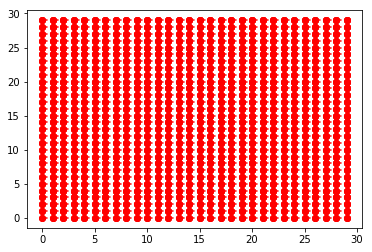

In [7]:
SOM_weight_plot(weight_map.index_map)

In [8]:
mock_data = np.array([[-0.5,-0.5],[-0.5,0.5],[2,2],[2,-1],[2,2],[2,-1],[2,2],[2,-1]])

Current epochs: 0


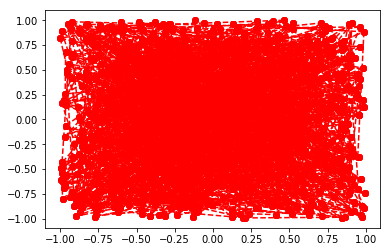

In [9]:
print('Current epochs:', weight_map.epoch)
SOM_weight_plot(weight_map.weights)

Current epochs: 20


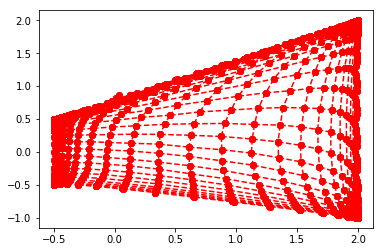

In [10]:
weight_map.train(mock_data, additional_epochs=20)
print('Current epochs:', weight_map.epoch)

SOM_weight_plot(weight_map.weights)

In [11]:
clust_1 = [[-0.7,-0.7]]
clust_2 = [[-0.5,0.5]]
clust_3 = [[1,0]]
clust_4 = [[2+0.5*np.random.rand(),-1+0.5*np.random.rand()],
           [2+0.5*np.random.rand(),-1+0.5*np.random.rand()]]
clust_5 = [[2+0.5*np.random.rand(),2+0.5*np.random.rand()],
           [2+0.5*np.random.rand(),2+0.5*np.random.rand()],
           [2+0.5*np.random.rand(),2+0.5*np.random.rand()],
           [2+0.5*np.random.rand(),2+0.5*np.random.rand()]]
mock_data = np.array(clust_1 + clust_2 + clust_3 + clust_4 + clust_5)

In [12]:
input_features = 2
map_size = 30
learning_rate_init = 1
learning_decay = 5
neighbor_init = 10
neighbor_decay = 10

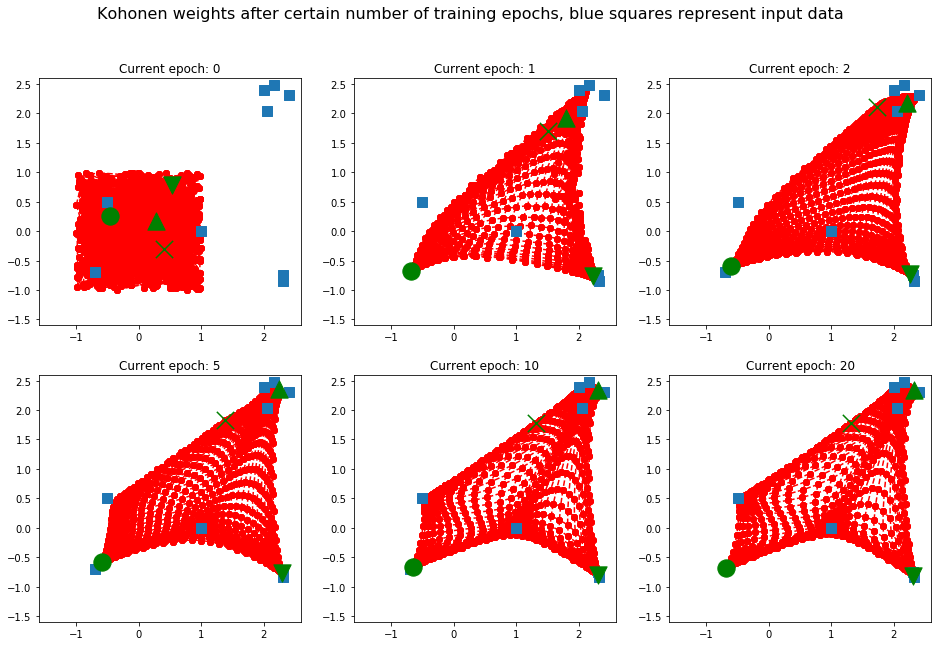

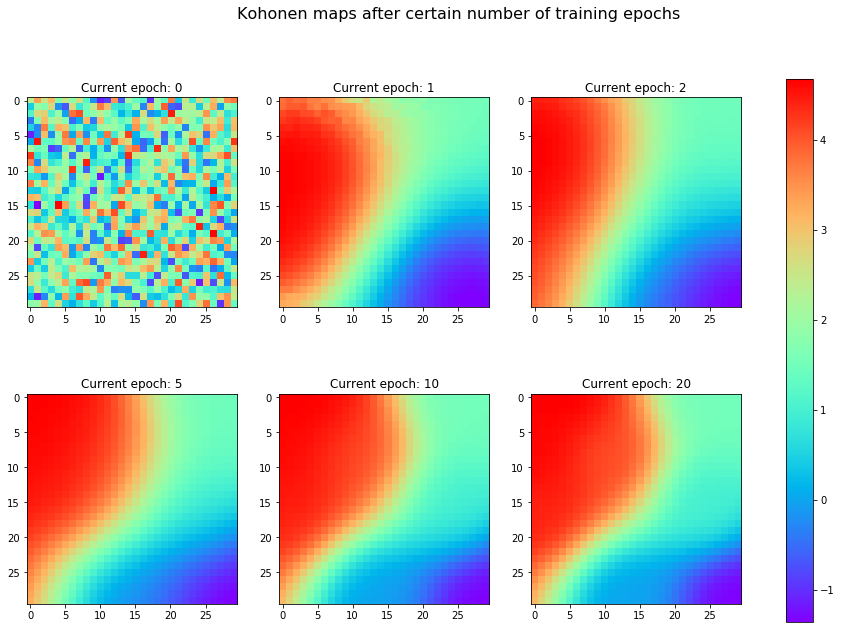

In [13]:
weight_map = SOM(input_features, map_size, learning_rate_init, learning_decay, neighbor_init, neighbor_decay)

epochs_to_train = [0, 1, 1, 3, 5, 10, 30]

fig_weights, axes_weights = plt.subplots(2,3,figsize=(16,10))
fig_weights.suptitle('Kohonen weights after certain number of training epochs, blue squares represent input data', fontsize=16)

fig_map, axes_map = plt.subplots(2,3,figsize=(16,10))
fig_map.suptitle('Kohonen maps after certain number of training epochs', fontsize=16)

for (ax_weights, ax_map, add_epochs) in zip(axes_weights.ravel(), axes_map.ravel(), epochs_to_train):
    # run weight update
    weight_map.train(mock_data, additional_epochs=add_epochs)
    
    # plot SOM weights
    SOM_weight_ax(weight_map.weights, ax=ax_weights)
    # by default, a line has zorder=2
    # zorder level indicates if a layer (line, scatter, etc.) will be in the background/foreground
    ax_weights.set_title('Current epoch: %d' %weight_map.epoch)
    # plot input data points
    ax_weights.scatter(mock_data[:,0], mock_data[:,1], s=100, marker='s', zorder=3)
    # track the corner weights of map_index 
    # ([0,0], [0,map_size-1], [map_size-1,0], [map_size-1,map_size-1])
    ax_weights.scatter(weight_map.weights[0,0,0], weight_map.weights[0,0,1], s=300, c='g', marker='^', zorder=4)
    ax_weights.scatter(weight_map.weights[0,map_size-1,0], weight_map.weights[0,map_size-1,1], s=300, c='g', marker='v', zorder=4)
    ax_weights.scatter(weight_map.weights[map_size-1,0,0], weight_map.weights[map_size-1,0,1], s=300, c='g', marker='x', zorder=4)
    ax_weights.scatter(weight_map.weights[map_size-1,map_size-1,0], weight_map.weights[map_size-1,map_size-1,1], s=300, c='g', marker='o', zorder=4)
    # set x_lim, y_lim
    ax_weights.set_xlim(-1.6, 2.6)
    ax_weights.set_ylim(-1.6, 2.6)
    
    #plot SOM maps
    im = ax_map.imshow(weight_map.weights.sum(axis=2), cmap='rainbow')
#     im = ax_map.imshow(weight_map.weights[:,:,0], cmap='rainbow')
    ax_map.set_title('Current epoch: %d' %weight_map.epoch)  
    
fig_map.colorbar(im, ax=axes_map.ravel().tolist())    
plt.show()

In [14]:
# GDP per capita
gdp = pd.read_csv("gdp-per-capita-worldbank.csv")

# select data from 2012 and drop any rows with NaN
gdp = gdp[gdp.Year == 2012].dropna(axis=0)

# reset index to start from 0, ... and drop the original index
gdp = gdp.reset_index(drop=True)

In [15]:
# income inequality index
ineq = pd.read_csv("economic-inequality-gini-index.csv")

# select data from 2012 and drop any rows with NaN
ineq = ineq[ineq.Year == 2012].dropna(axis=0)

# reset index to start from 0, ... and drop the original index
ineq = ineq.reset_index(drop=True)

In [16]:
# countries that appear in both datasets
countries = np.intersect1d(gdp.Code.values, ineq.Code.values)

In [17]:
# keep only rows with countries in the list
gdp = gdp[gdp.Code.isin(countries)].reset_index(drop=True)
ineq = ineq[ineq.Code.isin(countries)].reset_index(drop=True)

In [18]:
# check that all countries line up nicely
(gdp.Code==ineq.Code).all()

True

In [19]:
# new DataFrame having both GDP_cap and income_inequality_index
data = {'Country':gdp.Entity.values, 
 'Code':gdp.Code.values, 
 'GDP_cap':gdp.iloc[:,-1].values, 
 'income_inequality_index':ineq.iloc[:,-1].values}

data = pd.DataFrame(data)

# a normalized DataFrame
data_normalize = {'Country':gdp.Entity.values, 
 'Code':gdp.Code.values, 
 'GDP_cap':(gdp.iloc[:,-1].values - gdp.iloc[:,-1].values.mean())/gdp.iloc[:,-1].values.std(), 
 'income_inequality_index':(ineq.iloc[:,-1].values - ineq.iloc[:,-1].values.mean())/ineq.iloc[:,-1].values.std()}

data_normalize = pd.DataFrame(data_normalize)

In [20]:
data

,Code,Country,GDP_cap,income_inequality_index
0,ALB,Albania,10369.761659,28.96
1,ARG,Argentina,19224.874400,42.49
2,ARM,Armenia,7511.132482,30.48
3,AUT,Austria,44365.128528,30.48
4,BLR,Belarus,17479.929135,26.53
5,BEL,Belgium,41006.421726,27.59
6,BTN,Bhutan,7032.746660,38.81
7,BOL,Bolivia,5792.933051,46.70
8,BRA,Brazil,15118.138451,52.67
9,BGR,Bulgaria,15771.994537,36.01


In [20]:
data.head()

,Code,Country,GDP_cap,income_inequality_index
0,ALB,Albania,10369.761659,28.96
1,ARG,Argentina,19224.874400,42.49
2,ARM,Armenia,7511.132482,30.48
3,AUT,Austria,44365.128528,30.48
4,BLR,Belarus,17479.929135,26.53


In [21]:
data_normalize.head()

,Code,Country,GDP_cap,income_inequality_index
0,ALB,Albania,-0.584432,-0.937254
1,ARG,Argentina,-0.050786,0.714790
2,ARM,Armenia,-0.756705,-0.751659
3,AUT,Austria,1.464272,-0.751659
4,BLR,Belarus,-0.155944,-1.233963


In [136]:
sampling = data_normalize.sample(10)
sampling['FOM'] = (sampling.GDP_cap) + (sampling.income_inequality_index*-1)

# ใช้ SOM แยกกลุ่มประเทศตาม GDP/cap และ income inequality

เมื่อสร้าง `class SOM` แล้ว เราก็มาลองใช้กันดู โดยข้อมูลที่ผมดึงมาทดสอบเป็นข้อมูล GDP per capita (ผลิตภัณฑ์มวลรวมภายในประเทศต่อประชากร) และ income inequality index (ดัชนีความเหลื่อมล้ำทางรายได้) ของประเทศต่างๆ โดยนำข้อมูลมาจาก [https://ourworldindata.org/](https://ourworldindata.org/). 

## การเตรียมข้อมูล
ขอกล่าวสั้นๆ เรื่องการเตรียม data ว่าเป็นชุดข้อมูลจากปี 2012 ของกลุ่มของ 72 ประเทศ ที่มีทั้งค่า GDP/cap และ Income inequality ที่ได้ปรับ standardize ค่าทั้งสองให้ mean=0 และ SD=1 จากนั้นจึงสุ่มมา 10 ประเทศ ที่จะใช้เป็นตัวอย่างในการแสดงการแบ่งกลุ่มข้อมูลโดยใช้ SOM

นอกจากนั้นผมได้กำหนด Figure of Merit (FOM) ขึ้นมาโดย FOM = (Normalized_GDP_cap) + (-1)(Normalized_inequality_index) เพื่อช่วยให้การเปรียบเทียบกลุ่มประเทศเหล่านี้ง่ายขึ้น

ปล. GDP/cap สูง = ดี, Income inequality ต่ำ = ดี, FOM สูง = ดี

10 ประเทศที่สุ่มมาใช้มีดังนี้

In [137]:
sampling

,Code,Country,GDP_cap,income_inequality_index,FOM
66,TUR,Turkey,0.012923,0.431513,-0.418590
51,PRY,Paraguay,-0.768681,1.408332,-2.177013
42,MDG,Madagascar,-1.126739,0.734327,-1.861065
24,FIN,Finland,1.195964,-1.161922,2.357887
47,MNE,Montenegro,-0.361660,-0.544085,0.182425
1,ARG,Argentina,-0.050786,0.714790,-0.765576
34,ITA,Italy,0.913607,-0.180220,1.093827
65,THA,Thailand,-0.338641,0.320400,-0.659041
70,URY,Uruguay,-0.095833,0.571931,-0.667764
7,BOL,Bolivia,-0.860251,1.228841,-2.089093


In [138]:
sampling_data = sampling[['GDP_cap','income_inequality_index']].values
sampling_record = sampling[['GDP_cap','income_inequality_index']].values

## SOM training

หลังจากเตรียมข้อมูลแล้วเราก็กำหนดตัวแปรเริ่มต้น เพื่อ train SOM ครับ
input_features = 2 (คือ GDP/cap และ income inequality)
map_size = 30 (ได้ SOM ขนาด 30-by-30)
learning_rate_init, learning_decay, neighbor_init, neighbor_decay พวกนี้กำหนดเพื่อให้การเรียงตัวของ SOM นั้น converge และแยกค่าได้ดี ตรงนี้ขี้นกับขนาดของ map และการ spread ของข้อมูลที่เรามี ต้องลองปรับค่าและดูผลครับ

เพื่อติดตามการ train หรือ self-organizion ของ map นี้ ชุดแผนผังด้านล่างแสดงค่า FOM ของทุกจุดของ map เมื่อผ่านการ train ไป 0, 5, 20, 50 รอบนะครับ โดยละเอียด คือ
* แผนผังซ้ายบน: FOM map หลัง map initialization หรือ คือหลังขั้นตอนที่ 4 ในตัวอย่างเรื่อง pokemon
* แผนผังขวาบน: FOM map หลัง 5th training session หรือ คือหลังจบขั้นตอนที่ **6** ในตัวอย่างเรื่อง pokemon ไป 5 รอบ
* แผนผังซ้ายล่าง: FOM map หลัง 20th training session หรือ คือหลังจบขั้นตอนที่ **6** ไป 20 รอบ
* แผนผังซ้ายล่าง: FOM map หลัง 50th training session หรือ คือหลังจบขั้นตอนที่ **6** ไป 50 รอบ

โดยในแต่ละ map ผมได้หา winner index พร้อมวางตำแหน่งของ 10 ประเทศที่ใช้เป็นข้อมูลอ้างอิงไว้ด้วย 

In [139]:
input_features = 2
map_size = 30
learning_rate_init = 1
learning_decay = 10
neighbor_init = 10
neighbor_decay = 20

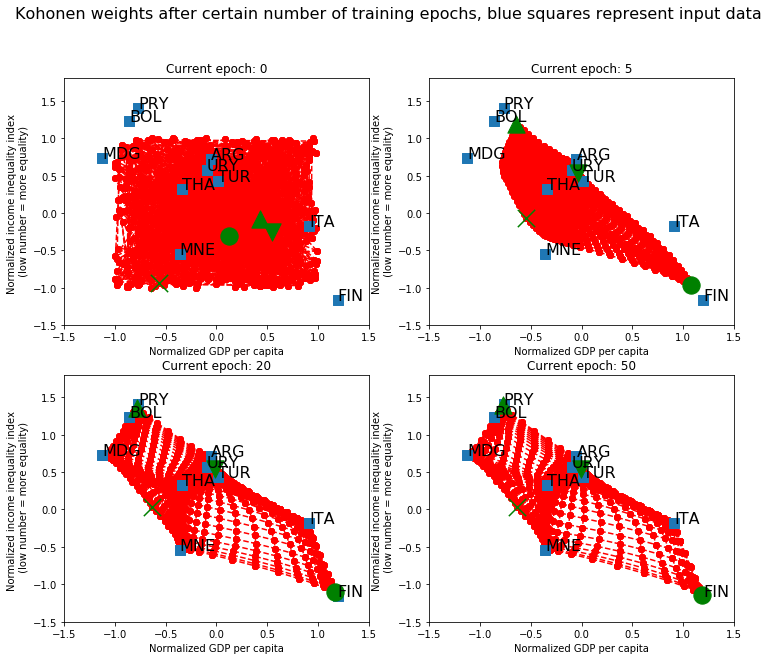

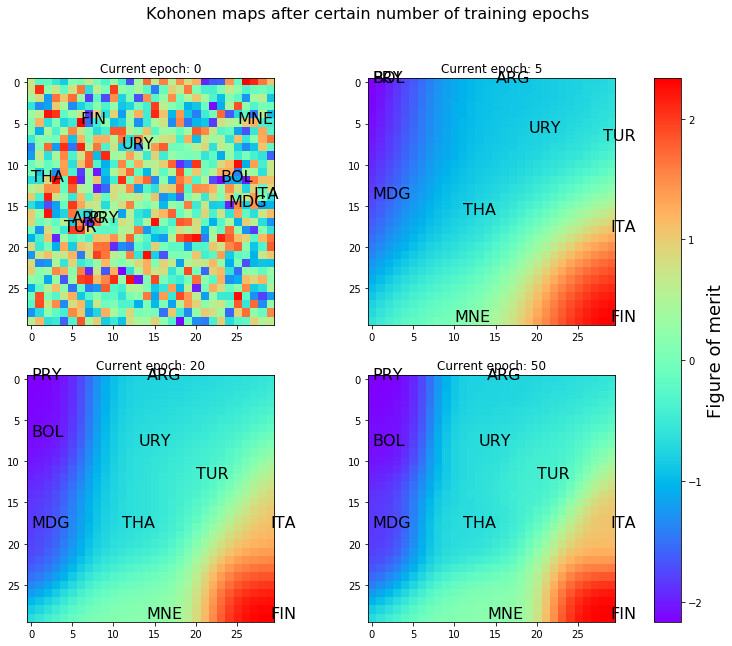

In [141]:
weight_map = SOM(input_features, map_size, learning_rate_init, learning_decay, neighbor_init, neighbor_decay)

epochs_to_train = [0, 5, 15, 30]

fig_weights, axes_weights = plt.subplots(2,2,figsize=(12,10))
fig_weights.suptitle('Kohonen weights after certain number of training epochs, blue squares represent input data', fontsize=16)

fig_map, axes_map = plt.subplots(2,2,figsize=(14,10))
fig_map.suptitle('Kohonen maps after certain number of training epochs', fontsize=16)

for (ax_weights, ax_map, add_epochs) in zip(axes_weights.ravel(), axes_map.ravel(), epochs_to_train):
    
    # run weight update
    weight_map.train(sampling_data, additional_epochs=add_epochs)
    
    # plot SOM weights
    SOM_weight_ax(weight_map.weights, ax=ax_weights)
    # by default, a line has zorder=2
    # zorder level indicates if a layer (line, scatter, etc.) will be in the background/foreground
    ax_weights.set_title('Current epoch: %d' %weight_map.epoch)
    
    # plot input data points
    ax_weights.scatter(sampling_record[:,0], sampling_record[:,1], s=100, marker='s', zorder=3)
    for i in range(sampling_record.shape[0]):
        ax_weights.annotate(sampling.Code.values[i], xy=(sampling_record[i,0], sampling_record[i,1]), xycoords='data', fontsize=16, zorder=4)
    
    # track the corner weights of map_index 
    # ([0,0], [0,map_size-1], [map_size-1,0], [map_size-1,map_size-1])
    ax_weights.scatter(weight_map.weights[0,0,0], weight_map.weights[0,0,1], s=300, c='g', marker='^', zorder=4)
    ax_weights.scatter(weight_map.weights[0,map_size-1,0], weight_map.weights[0,map_size-1,1], s=300, c='g', marker='v', zorder=4)
    ax_weights.scatter(weight_map.weights[map_size-1,0,0], weight_map.weights[map_size-1,0,1], s=300, c='g', marker='x', zorder=4)
    ax_weights.scatter(weight_map.weights[map_size-1,map_size-1,0], weight_map.weights[map_size-1,map_size-1,1], s=300, c='g', marker='o', zorder=4)
    
    # set x_lim, y_lim
    ax_weights.set_xlim(-1.5, 1.5)
    ax_weights.set_xlabel('Normalized GDP per capita')
    ax_weights.set_ylim(-1.5, 1.8)
    ax_weights.set_ylabel('Normalized income inequality index \n (low number = more equality)')
    
    #plot SOM maps
    weight_FOM = weight_map.weights[:,:,1]*-1 + weight_map.weights[:,:,0]
    im = ax_map.imshow(weight_FOM, cmap='rainbow')
    ax_map.set_title('Current epoch: %d' %weight_map.epoch)   
    for i in range(sampling_record.shape[0]):
        ax_map.annotate(sampling.Code.values[i], xy=(weight_map.winner_index(sampling_record[i])[::-1]), xycoords='data', fontsize=16, zorder=4)    
        # need to do sampling_record[i])[::-1] to get (x,y) -- by default matrix index arranges in (y,x)==(row,column)
    
cbar = fig_map.colorbar(im, ax=axes_map.ravel().tolist())
cbar.set_label('Figure of merit', fontsize=18, rotation=90)

plt.show()

## สรุปผลการแยกกลุ่มประเทศโดย SOM

เห็นว่าตอนแรกสีของ FOM จัดอย่างสุ่มและกลุ่มประเทศก็กระจายตัวกันโดยไม่มีแบบแผนที่เราจะจัดกลุ่มได้

เมื่อ train ผ่านไป 5 รอบ สี FOM ของ map ก็เริ่มแบ่งโซนกัน โดยโซนขวาล่างและซ้ายบนนั้นมีค่า FOM สูงและต่ำ ตามลำดับ นอกจากนั้นกลุ่มประเทศก็จัดเรียงตำแหน่งใหม่ด้วย เช่น Finland (FIN) มีคุณภาพชีวิตประชากรดีก็อยู่ทางขวาล่าง ส่วน Paraguay (PRY) มีคุณภาพชีวิตประชากรไม่ดีนักก็อยู่ทางซ้ายบน

เมื่อ train ผ่านไป 20 รอบ map ก็ดูกระจายตัวดีขึ้น จัดเรียงแยกประเทศต่างๆ ออกมาชัดเจนขึ้น และ map ก็ค่อนข้าง stable แล้ว โดยเห็นได้ว่าหน้าตา map นั้นเปลี่ยนแปลงน้อยมากเมื่อเทียบ SOM หลัง train 20 รอบ และ 50 รอบ

โดยมองง่ายๆ ด้วยตาก็สามารถแบ่งกลุ่มประเทศทั้งสิบได้เป็นสามกลุ่มประเทศ คือ
1. กลุ่มคุณภาพชีวิตไม่ดีนัก (FOM < -1) ได้แก่ Paraguay (PRY), Bolivia (BOL), Madagascar (MDG)
2. กลุ่มคุณภาพชีวิตปานกลาง (-1< FOM < 0) ได้แก่ Argentina (ARG), Uruguay (URY), Turkey (TUR), Thailand (THA)
3. กลุ่มคุณภาพชีวิตดี (FOM > 1 ) ได้แก่ Montenegro (MNE), Italy (ITA), Finland (FIN)

โดยเรายังสามารถใช้ algorithm อื่น เช่น k-means clustering เพื่อช่วยในการแบ่งกลุ่มข้อมูลให้ดียิ่งขึ้น

# บทส่งท้าย

จบแล้วครับสำหรับหลักการและตัวอย่างการใช้ self-organizing map ที่สามารถเอาไปใช้ช่วยในการแสดงผลและจัดกลุ่มข้อมูล โดยนอกจากตัวอย่างการจัดกลุ่มประเทศตาม GDP/cap และ income inequality index ที่แสดงเป็นตัวอย่างแล้ว ยังสามารถนำไปใช้ประโยชน์ได้หลากหลาย ไม่ว่าจะในทางการศึกษาวิจัยหรือในทางธุรกิจ

นอกจากข้อมูลและหลักการที่นำเสนอข้างต้นแล้ว SOM ยังมีรายละเอียดน่าสนใจอื่นๆ เช่น

1. เนื่องจาก map initialization นั้นทำโดยการสุ่ม การรัน code สร้าง SOM แต่ละครั้งจะได้ map ที่แตกต่างกันออกไป
  อาจจะช่วยโดยการ initialize ให้เรียงค่าน้อยไปมาก หรือ มากไปน้อย ตามแนวแกน x, y
2. SOM ไม่มี convergence criteria ที่ชัดเจน การแบ่งกลุ่มข้อมูลอาจจะดูออกมาดี แต่ไม่สามารถบอกได้ว่ายังดีกว่านี้ได้อีกหรือไม่
3. SOM มีความคล้ายกับ k-means ที่ใช้แบ่งกลุ่มข้อมูล (clustering) โดย SOM มี[ข้อดีกว่าในเรื่องของการช่วย visualization](https://stats.stackexchange.com/questions/236959/self-organizing-maps-vs-k-means-som-with-a-lot-of-nodes) โดยตรงนี้จะมีประโยชน์เมื่อข้อมูลมีจำนวน features มากกว่า 3 ซึ่งไม่สามารถทำ visualization ของ k-means ได้
4. SOM ยังมีความเกี่ยวพันกับ principal component analysis (PCA) ตรงที่เป็นการทำ dimensionality reduction เหมือนกัน แต่ SOM สามารถจัดการข้อมูลที่เป็น non-linear ได้ดีกว่า
5. นอกจากการ visualization โดยการเปลี่ยนข้อมูล เช่น เฉดสีของค่า FOM ใน map แล้ว เรายังสามารถ track กระบวนการ self-organization ของ map โดยการดูการเคลื่อนไหวของ node บน map ใน feature space ได้ด้วย เช่น ภาพจาก [Wikipedia](https://en.wikipedia.org/wiki/Self-organizing_map#/media/File:Somtraining.svg) ![SOM training process](SOM_track.png)

ข้อ 1 และ 2 นั้นผมเองก็ไม่เข้าใจนัก หากใครทราบรายละเอียดรบกวนช่วยชี้แนะด้วยนะครับ

สุดท้าย หากมีข้อสงสัย คำแนะนำ หรือส่วนที่ต้องการให้แก้ไข เชิญส่งข้อความมาได้ครับ ทั้งทาง [Facebook](https://facebook.com/chatdanai.lumdee), [LinkedIn](https://linkedin.com/in/chatdanai-lumdee) หรือ <chatdanai.l@gmail.com>